# Model based on Word

In [3]:
pip install sklearn

  Preparing metadata (setup.py): started
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2959 sha256=cafe9ebada95437946191e9ee9773c3b05e9c4519f2e8a9f306d9227b8ec3855
  Stored in directory: c:\users\sparrow\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [60]:
import pandas as pd
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn import tree
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
word_count = pd.read_csv('../data/word_count')

In [3]:
word_count.head()

,Unnamed: 0,word,count,freq,subreddit,shared_words
0,wa,wa,20111,295.445865,relationship_advice,1
1,like,like,12730,187.013369,relationship_advice,1
2,just,just,12440,182.753048,relationship_advice,1
3,time,time,9200,135.154988,relationship_advice,1
4,want,want,9080,133.392096,relationship_advice,1


In [4]:
word_count.isna().sum().value_counts(ascending=False)

0    4
3    2
dtype: int64

In [5]:
word_count.dropna(inplace=True)

In [6]:
word_count.drop(columns='Unnamed: 0', inplace=True)	

In [7]:
word_count['subreddit'].value_counts()

AmItheAsshole          23992
relationship_advice    20724
Name: subreddit, dtype: int64

In [8]:
word_count['subreddit'].replace({'AmItheAsshole' :0, 'relationship_advice': 1},inplace=True)

In [9]:
word_count['subreddit'].value_counts()

0    23992
1    20724
Name: subreddit, dtype: int64

In [10]:
X = word_count.drop(columns=['subreddit','word'])
y = word_count['subreddit']

In [11]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=20)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31301, 3)
(13415, 3)
(31301,)
(13415,)


# Baseline with Dummy Classifier

In [13]:
dc = DummyClassifier()

In [14]:
dc.fit(X,y)

DummyClassifier()

In [15]:
dc.score(X_train,y_train)

0.5354461518801317

In [16]:
dc.score(X_test,y_test)

0.5390980245993291

In [17]:
predictions_dc = dc.predict(X_test)

{'Accuracy': 0.5390980245993291, 'Precision': 0.0, 'Sensitivity_recall': 0.0, 'Specificity': 0.0, 'F1_score': 0.0}


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


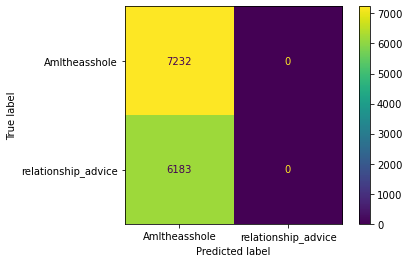

In [55]:
cm = confusion_matrix(y_test, predictions_dc, labels=dc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['AmItheasshole','relationship_advice'])
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_dc)
Precision = metrics.precision_score(y_test, predictions_dc)
Sensitivity_recall = metrics.recall_score(y_test, predictions_dc)
Specificity = metrics.recall_score(y_test, predictions_dc)
F1_score = metrics.f1_score(y_test, predictions_dc)
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})
plt.savefig('DummyClassifier')

# Logistic Regression

In [33]:
logreg = LogisticRegression()

In [34]:
logreg.fit(X,y)

LogisticRegression()

In [35]:
logreg.score(X_train,y_train)

0.7952781061307945

In [36]:
logreg.score(X_test,y_test)

0.8017890421170332

In [37]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [38]:
predictions_logreg = logreg.predict(X_test)

{'Accuracy': 0.8017890421170332, 'Precision': 0.8609176566980745, 'Sensitivity_recall': 0.6797671033478894, 'Specificity': 0.6797671033478894, 'F1_score': 0.7596927248079529}


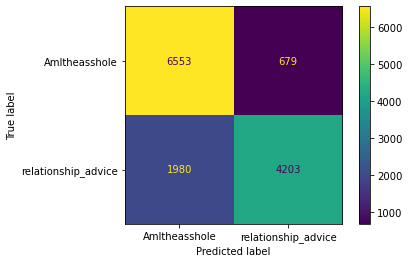

In [56]:
cm = confusion_matrix(y_test, predictions_logreg, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['AmItheasshole','relationship_advice'])
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_logreg)
Precision = metrics.precision_score(y_test, predictions_logreg)
Sensitivity_recall = metrics.recall_score(y_test, predictions_logreg)
Specificity = metrics.recall_score(y_test, predictions_logreg)
F1_score = metrics.f1_score(y_test, predictions_logreg)
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})
plt.savefig('Logistic Regression')

#  Gaussian Naive Bayes

In [40]:
gnb = GaussianNB()

In [41]:
gnb.fit(X_train,y_train)

GaussianNB()

In [42]:
gnb.score(X_train, y_train)

0.5342001852975943

In [43]:
gnb.score(X_test, y_test)

0.5408125232948192

In [44]:
predictions_gnb = gnb.predict(X_test)

{'Accuracy': 0.5408125232948192, 'Precision': 0.5389830508474577, 'Sensitivity_recall': 0.025715672003881612, 'Specificity': 0.025715672003881612, 'F1_score': 0.04908922506946589}


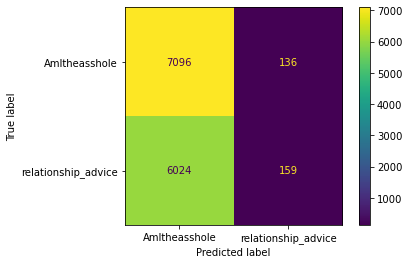

In [57]:
cm = confusion_matrix(y_test, predictions_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['AmItheasshole','relationship_advice'])
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_gnb)
Precision = metrics.precision_score(y_test, predictions_gnb)
Sensitivity_recall = metrics.recall_score(y_test, predictions_gnb)
Specificity = metrics.recall_score(y_test, predictions_gnb)
F1_score = metrics.f1_score(y_test, predictions_gnb)
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})
plt.savefig('Naive Bayes')

# KNN

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(X,y)

KNeighborsClassifier()

In [48]:
knn.score(X_train,y_train)

0.992971470560046

In [49]:
knn.score(X_test, y_test)

0.9932165486395825

In [50]:
predictions_knn = knn.predict(X_test)

{'Accuracy': 0.9932165486395825, 'Precision': 0.993199481865285, 'Sensitivity_recall': 0.9920750444767912, 'Specificity': 0.9920750444767912, 'F1_score': 0.9926369447366292}


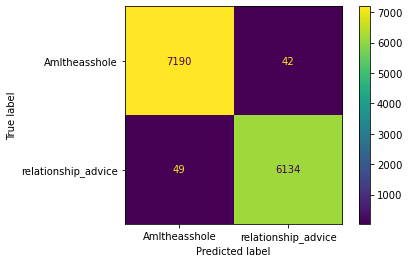

In [58]:
cm = confusion_matrix(y_test, predictions_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['AmItheasshole','relationship_advice'])
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_knn)
Precision = metrics.precision_score(y_test, predictions_knn)
Sensitivity_recall = metrics.recall_score(y_test, predictions_knn)
Specificity = metrics.recall_score(y_test, predictions_knn)
F1_score = metrics.f1_score(y_test, predictions_knn)
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})
plt.savefig('KNN')

# Random Forest Classifier

In [65]:
X, y = make_classification(n_samples=1000, n_features=3,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [66]:
clf.score(X_train,y_train)

C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.4645538481198684

In [68]:
clf.score(X_test, y_test)

C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.4609019754006709